# Basic Preprocessing to read data

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [26]:
FILE_PATH="dataset"

train_df = pd.read_csv(f"{FILE_PATH}/train.csv")
test_df = pd.read_csv(f"{FILE_PATH}/test.csv")

print(train_df.shape)
print(test_df.shape)

(750000, 18)
(250000, 17)


In [27]:
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [29]:
# test_df['y']
Y_TRAIN = train_df['y']
if 'y' in train_df.columns:
    train_df.drop('y',axis=1,inplace=True)
combine_df = pd.concat([train_df,test_df],axis=0)
combine_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown


In [30]:
if 'id' in combine_df.columns:
    combine_df.drop('id',axis=1,inplace=True)
combine_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown


# Feature Engineering
## Identify Numerical/Categorical Features & Transform Using Label Encoder

In [ ]:
# FINDING NUMS AND CATS Columns 
CATS = []
NUMS = []

for col in combine_df.columns:
    col_type = ""
    curr_col = combine_df[col]
    curr_col_nunique = curr_col.nunique()
    curr_col_na = curr_col.isna().sum()
    
    if curr_col.dtype == 'object':
        col_type = "CAT"
        CATS.append(col)
    else:
        col_type = "NUM"
        NUMS.append(col)
    
    print(f"{col_type} {col} has {curr_col_nunique} values")
    print(f"{col_type} {col} has {curr_col_na} NA")
    

print(f"""
CAT COLUMNS: {CATS} \n 
NUM COLUMNS: {NUMS} \n
      """)

NUM age has 78 values
NUM age has 0 NA
CAT job has 12 values
CAT job has 0 NA
CAT marital has 3 values
CAT marital has 0 NA
CAT education has 4 values
CAT education has 0 NA
CAT default has 2 values
CAT default has 0 NA
NUM balance has 8469 values
NUM balance has 0 NA
CAT housing has 2 values
CAT housing has 0 NA
CAT loan has 2 values
CAT loan has 0 NA
CAT contact has 3 values
CAT contact has 0 NA
NUM day has 31 values
NUM day has 0 NA
CAT month has 12 values
CAT month has 0 NA
NUM duration has 1798 values
NUM duration has 0 NA
NUM campaign has 52 values
NUM campaign has 0 NA
NUM pdays has 614 values
NUM pdays has 0 NA
NUM previous has 53 values
NUM previous has 0 NA
CAT poutcome has 4 values
CAT poutcome has 0 NA

CAT COLUMNS: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 
 
NUM COLUMNS: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 

      


In [ ]:
# Since we pick tree model, 
# and tree models actually works better categorical columns
# we are going to transform all to category
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

NEW_COLS = []
for col in CATS + NUMS:
    combine_df[f"{col}_tf"] = lb.fit_transform(combine_df[col])
    NEW_COLS.append(f"{col}_tf")

print(f"NEW COLS CREATED : {NEW_COLS}")


NEW COLS CREATED : ['job_tf', 'marital_tf', 'education_tf', 'default_tf', 'housing_tf', 'loan_tf', 'contact_tf', 'month_tf', 'poutcome_tf', 'age_tf', 'balance_tf', 'day_tf', 'duration_tf', 'campaign_tf', 'pdays_tf', 'previous_tf']


In [43]:
combine_df.loc[:,NEW_COLS].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 249999
Data columns (total 16 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   job_tf        1000000 non-null  int64
 1   marital_tf    1000000 non-null  int64
 2   education_tf  1000000 non-null  int64
 3   default_tf    1000000 non-null  int64
 4   housing_tf    1000000 non-null  int64
 5   loan_tf       1000000 non-null  int64
 6   contact_tf    1000000 non-null  int64
 7   month_tf      1000000 non-null  int64
 8   poutcome_tf   1000000 non-null  int64
 9   age_tf        1000000 non-null  int64
 10  balance_tf    1000000 non-null  int64
 11  day_tf        1000000 non-null  int64
 12  duration_tf   1000000 non-null  int64
 13  campaign_tf   1000000 non-null  int64
 14  pdays_tf      1000000 non-null  int64
 15  previous_tf   1000000 non-null  int64
dtypes: int64(16)
memory usage: 129.7 MB


# Feature Engineering: Feature Combinations
## Create feature interactions by combining pairs of features

In [ ]:
from itertools import combinations
combine_cols = combinations(NEW_COLS,2)

NEW_COLS_PAIR = []

for col_a, col_b in combine_cols:
    new_col = '_'.join([col_a,col_b])
    combine_val = combine_df[col_a].astype(str) + '_' + combine_df[col_b].astype(str)
    combine_df[new_col] = lb.fit_transform(combine_val)
    NEW_COLS_PAIR.append(new_col)




/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_37260/3933289304.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combine_df[new_col] = lb.fit_transform(combine_val)
/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_37260/3933289304.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combine_df[new_col] = lb.fit_transform(combine_val)
/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_37260/3933289304.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

NEW COLUMMS: 
 

[]


/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_37260/3933289304.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combine_df[new_col] = lb.fit_transform(combine_val)


In [59]:
print("NEW COLUMMS: \n \n")
for i in range(0,len(NEW_COLS_PAIR),10):
    print(NEW_COLS_PAIR[i:i+9])

print(combine_df.head())

NEW COLUMMS: 
 

['job_tf_marital_tf', 'job_tf_education_tf', 'job_tf_default_tf', 'job_tf_housing_tf', 'job_tf_loan_tf', 'job_tf_contact_tf', 'job_tf_month_tf', 'job_tf_poutcome_tf', 'job_tf_age_tf']
['job_tf_day_tf', 'job_tf_duration_tf', 'job_tf_campaign_tf', 'job_tf_pdays_tf', 'job_tf_previous_tf', 'marital_tf_education_tf', 'marital_tf_default_tf', 'marital_tf_housing_tf', 'marital_tf_loan_tf']
['marital_tf_month_tf', 'marital_tf_poutcome_tf', 'marital_tf_age_tf', 'marital_tf_balance_tf', 'marital_tf_day_tf', 'marital_tf_duration_tf', 'marital_tf_campaign_tf', 'marital_tf_pdays_tf', 'marital_tf_previous_tf']
['education_tf_housing_tf', 'education_tf_loan_tf', 'education_tf_contact_tf', 'education_tf_month_tf', 'education_tf_poutcome_tf', 'education_tf_age_tf', 'education_tf_balance_tf', 'education_tf_day_tf', 'education_tf_duration_tf']
['education_tf_pdays_tf', 'education_tf_previous_tf', 'default_tf_housing_tf', 'default_tf_loan_tf', 'default_tf_contact_tf', 'default_tf_month_tf

In [61]:
COLS_TO_KEEP = NEW_COLS + NEW_COLS_PAIR
final_combine_df = combine_df.loc[:,COLS_TO_KEEP]

final_train_df = final_combine_df.iloc[:len(train_df),:]
final_test_df = final_combine_df.iloc[len(train_df):,:]

print(final_train_df.shape)
print(final_test_df.shape)



(750000, 136)
(250000, 136)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,10,15,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [4,6,8],
    'max_features': ['sqrt','log2',None],
    'random_state':[42]
    
}

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(final_train_df,Y_TRAIN)

print(grid_search.best_params_)
print(grid_search.best_score_)

/Users/hieutrinh358/projects/ai-ml-coaching-material/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 10}
0.9475755738074886


In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, f1_score, recall_score, precision_score
def get_score_metrics(y_true, y_pred, y_proba):
    # Calculate metrics
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    roc_auc = roc_auc_score(y_true,y_proba)    
    
    # Print results
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    
def show_confusion_matrix(y_true, y_pred):
    labels = ['No', 'Yes']  # 0='No', 1='Yes'

    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=labels,
        cmap=plt.cm.Blues,
        values_format='d'
    )

    fig = disp.figure_
    fig.set_figwidth(10)
    fig.set_figheight(10) 
    fig.suptitle('Plot of confusion matrix')

    # To show full numbers instead of scientific notation
    plt.show()



Precision: 0.7558
Recall:    0.6132
F1-Score:  0.6770
ROC-AUC:   0.9539


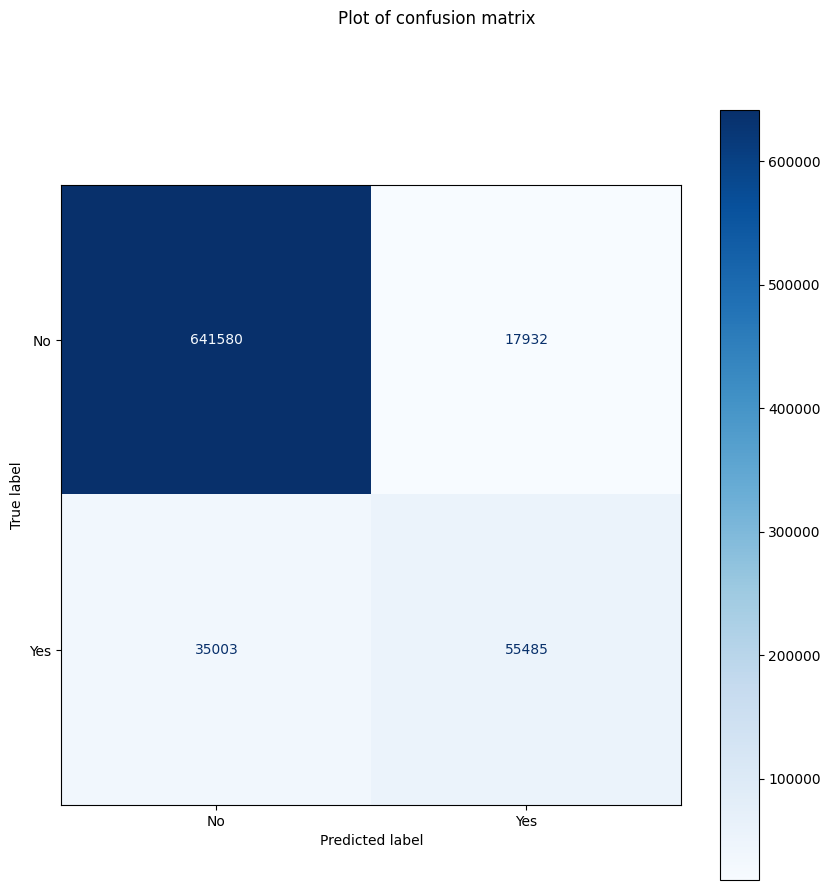

In [65]:
Y_pred = grid_search.predict(final_train_df)
Y_proba = grid_search.predict_proba(final_train_df)[:,1]
get_score_metrics(Y_TRAIN, Y_pred, Y_proba)
show_confusion_matrix(Y_TRAIN, Y_pred)



In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [10],  # None = unlimited depth
    'min_samples_split': [5, 10],
    'min_samples_leaf': [4, 8],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['log_loss'],  # Just use log_loss
    'random_state':[42]

}

random_forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(random_forest_clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(final_train_df,Y_TRAIN)

print(grid_search.best_params_)
print(grid_search.best_score_)

/Users/hieutrinh358/projects/ai-ml-coaching-material/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 42}
0.9528034255042076


Precision: 0.8215
Recall:    0.3824
F1-Score:  0.5219
ROC-AUC:   0.9563


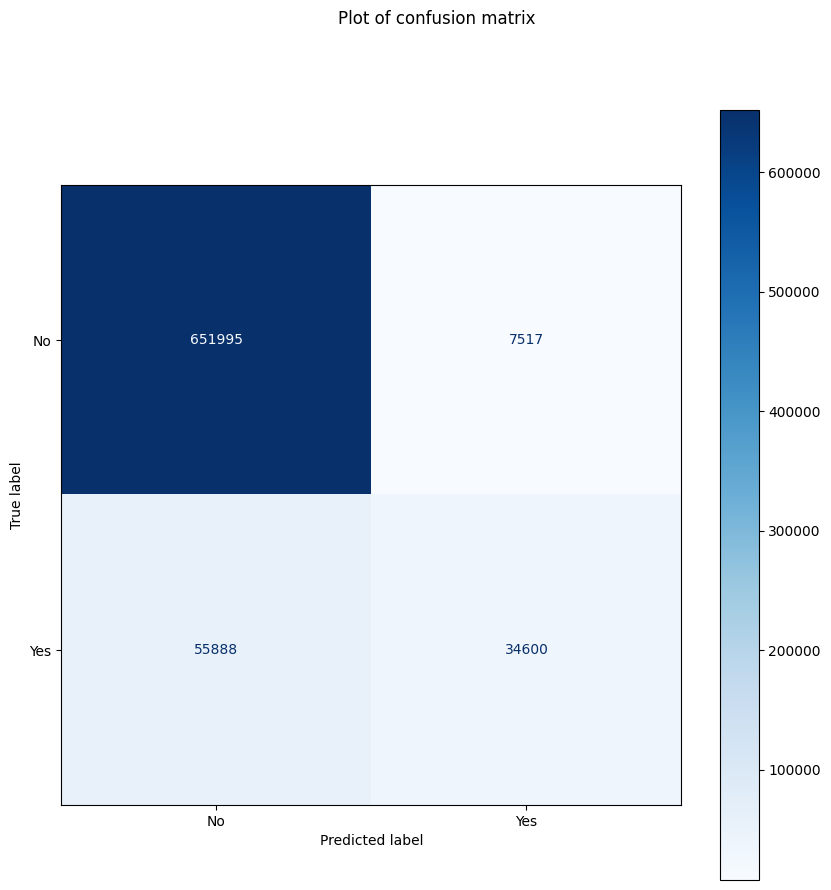

In [70]:
Y_pred = grid_search.predict(final_train_df)
Y_proba = grid_search.predict_proba(final_train_df)[:,1]
get_score_metrics(Y_TRAIN, Y_pred, Y_proba)
show_confusion_matrix(Y_TRAIN, Y_pred)


In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier(
    objective="binary:logistic",
    eval_metric='auc',
    subsample=0.8,
    colsample_bytree=0.7,
    grow_policy="lossguide",
    seed=42
)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_leaves': [16, 32, 64]
}

grid_search = RandomizedSearchCV(
    xgb_clf, 
    param_distributions=param_grid,
    n_iter=20, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1,
    random_state=42
)

grid_search.fit(final_train_df, Y_TRAIN)

print(grid_search.best_params_)
print(grid_search.best_score_)

/Users/hieutrinh358/projects/ai-ml-coaching-material/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/hieutrinh358/projects/ai-ml-coaching-material/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_leaves': 64, 'learning_rate': 0.1}
0.9649964257979045


Precision: 0.7683
Recall:    0.6648
F1-Score:  0.7128
ROC-AUC:   0.9673


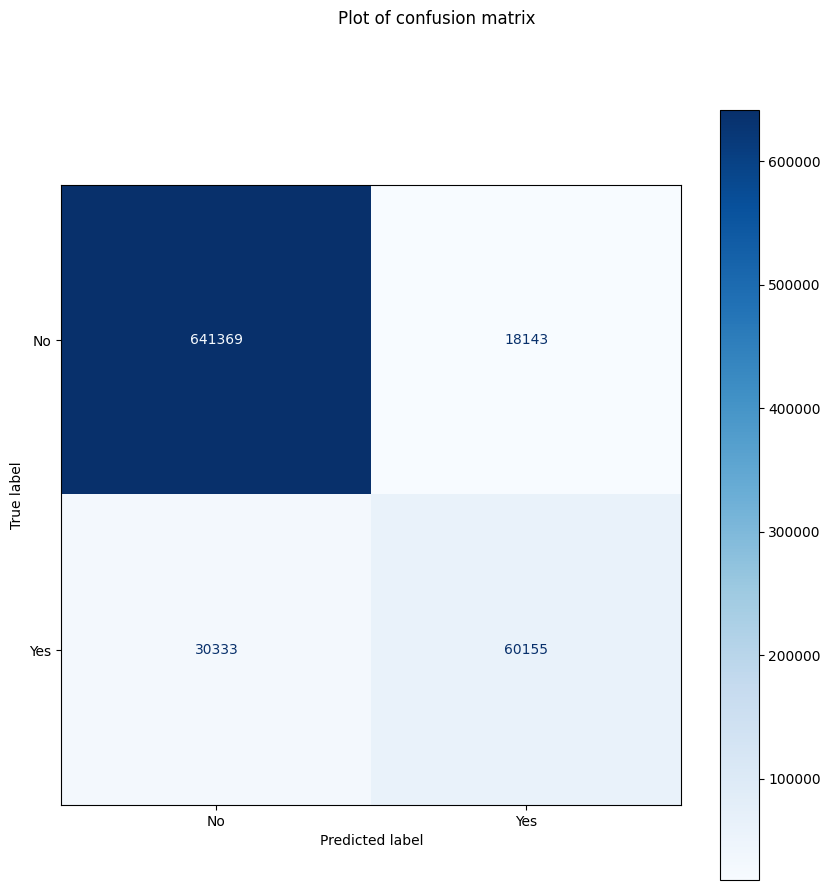

In [74]:
Y_pred = grid_search.predict(final_train_df)
Y_proba = grid_search.predict_proba(final_train_df)[:,1]
get_score_metrics(Y_TRAIN, Y_pred, Y_proba)
show_confusion_matrix(Y_TRAIN, Y_pred)


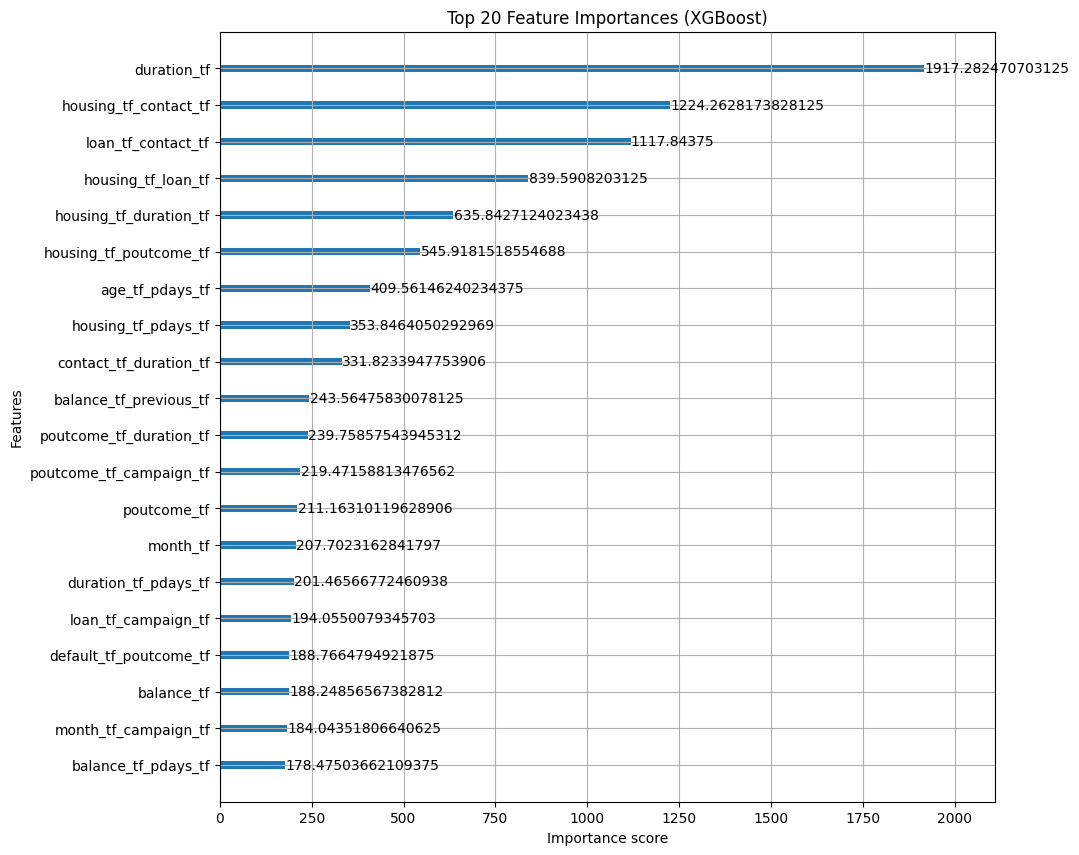

In [84]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(grid_search.best_estimator_, max_num_features=20, importance_type='gain',ax=ax)
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()